## Merge file 

In [1]:
import csv
import pandas as pd 

# Generate filenames programmatically
path = "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTBBE/100sim60Xgb1_5StataData/"
files = [path + "new_final_balance_{}.csv".format(i) for i in range(100)]

merged_filename =  "data/60stat_merge_result.csv"

with open(merged_filename, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    
    for index, filename in enumerate(files):
        with open(filename, 'r') as infile:
            reader = csv.reader(infile)
            
            # Skip header only if it's not the first file
            if index != 0:
                next(reader, None)
                
            # Write rows from current file to the output file
            writer.writerows(reader)

## Find average of each betting agents. 

In [1]:
import pandas as pd

# Read the data
df = pd.read_csv("Data/60stat_merge_result.csv", header=None)

# Drop the header row
df = df.drop(0)

# Convert all values to float
df = df.astype(float)

# Define ranges for mapping => to group agents with same type/category
ranges = [ 
    (0, 10, 1),
    (10, 20, 2),
    (20, 30, 3),
    (30, 40, 4),
    (40, 50, 5),
    (50, 55, 6),
    (55, 60, 7)
]

# Create a mapping function based on ranges
def get_mapping(col):
    for start, end, category in ranges:
        if start <= col < end:
            return category

# Create a new DataFrame with mapped columns
mapped_df = df.copy()
mapped_df.columns = [get_mapping(col) for col in df.columns]

# Group by column categories and compute the mean
averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()
averaged_df = averaged_df - 100000000

print(averaged_df)

              1            2          3           4          5           6  \
1    -32.418265   205.770184 -43.361664 -137.826672  16.127745  752.286830   
2    209.275345   344.374655 -42.900000  -30.000000  -9.150000 -235.604934   
3   -298.625732   -24.075396 -32.243827  -76.816159  13.200000  173.474180   
4   -636.131197   954.782858 -27.264421 -214.318347  43.666532  239.306147   
5   -227.321729   638.747895   7.895894  -56.641059  32.633576 -340.616941   
..          ...          ...        ...         ...        ...         ...   
96  -170.906800   125.151830 -28.754856 -124.597263  17.359474 -582.375102   
97  -259.867624   144.398658  -8.262081   -8.879194   9.150000  -79.421129   
98  -274.155892   487.256191 -27.220551 -231.073398  24.418968 -512.337674   
99   107.475809  1167.101583 -92.422925 -201.000000  97.972925  262.647197   
100 -249.450690   109.467687  -8.100000 -128.205643  31.339229 -180.783477   

               7  
1    -768.869485  
2    -707.595066  
3     

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_76372/3250071954.py:34: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()


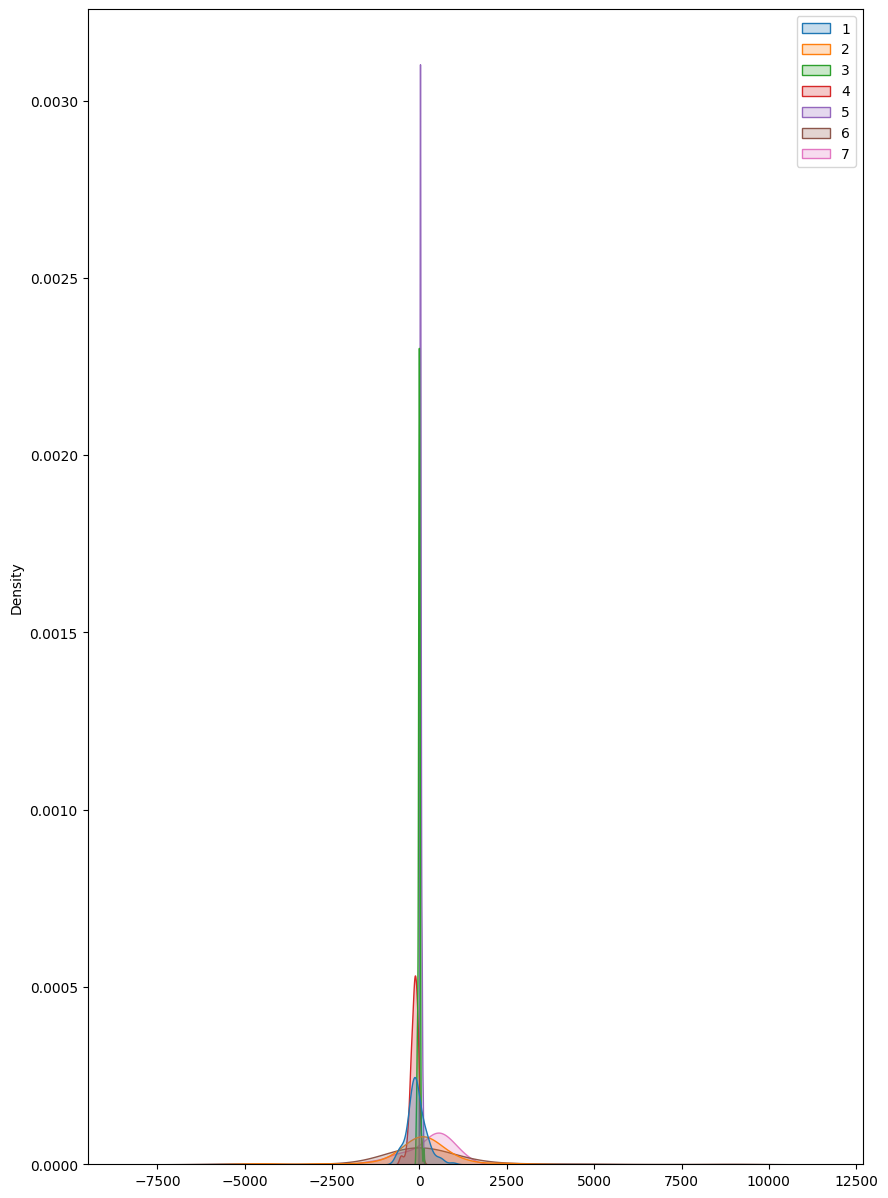

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
distributionPlot = sns.kdeplot(data=averaged_df,fill=True)
plt.show()


## Statistical Testing

In [3]:
from scipy import stats
xgboost_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    # Check normality for both columns
    _, pvalue_xgboost = stats.shapiro(xgboost_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost",pvalue_xgboost)
    print("pvalue_other_agent ",pvalue_other_agent)
    # If both are normally distributed
    if pvalue_xgboost > 0.05 and pvalue_other_agent > 0.05:
        
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


P_value_xgboost 0.00023497563240558898
pvalue_other_agent  0.0014449784477318212
not normal
There is a statistically significant difference
P-Value 7.902220956942271e-08

P_value_xgboost 0.00023497563240558898
pvalue_other_agent  1.3325770574488635e-10
not normal
There is a statistically significant difference
P-Value 0.0035712577899178464

P_value_xgboost 0.00023497563240558898
pvalue_other_agent  3.0864337814211806e-05
not normal
There is a statistically significant difference
P-Value 3.2997219830270926e-07

P_value_xgboost 0.00023497563240558898
pvalue_other_agent  0.0019315339564685992
not normal
There is a statistically significant difference
P-Value 5.140327456301871e-10

P_value_xgboost 0.00023497563240558898
pvalue_other_agent  1.1353269626365914e-06
not normal
There is a statistically significant difference
P-Value 1.3201538797215e-06

P_value_xgboost 0.00023497563240558898
pvalue_other_agent  5.913018769901496e-12
not normal
There is a statistically significant difference
P-V

# Stat test with plotting

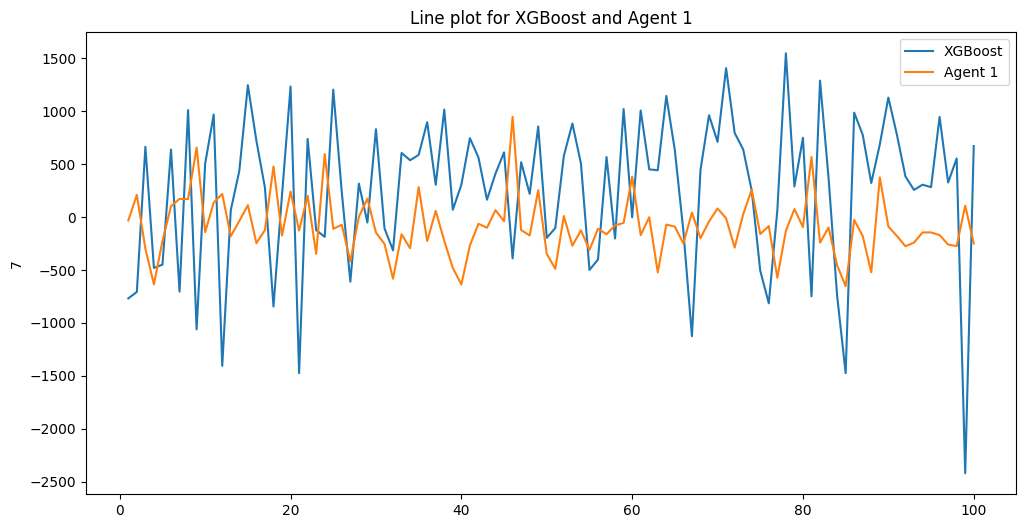

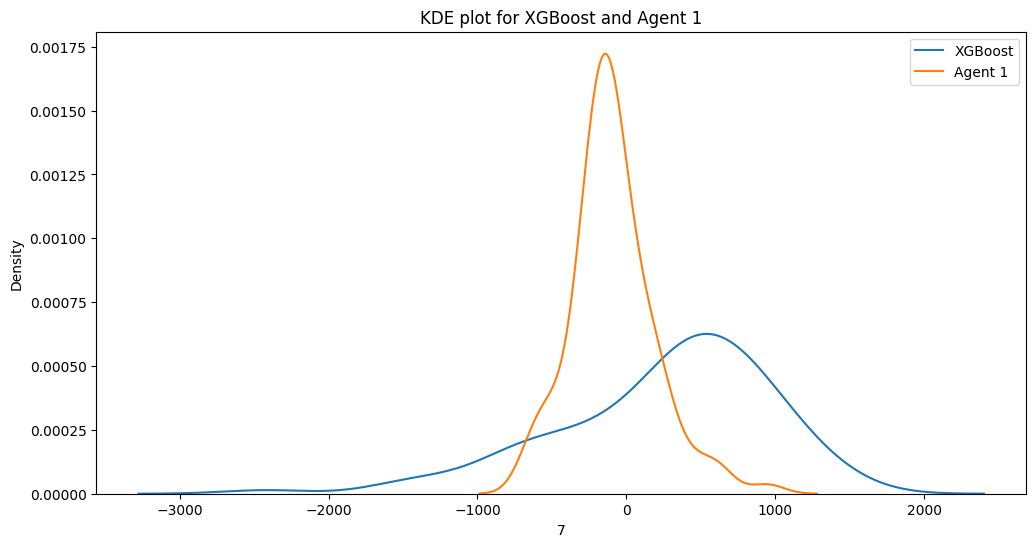

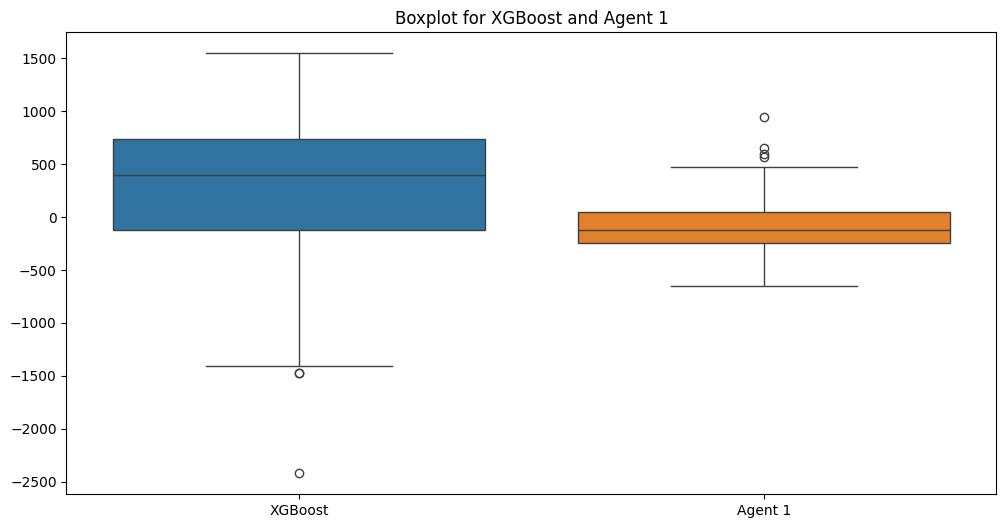

P_value_xgboost 0.00023497563240558898
pvalue_other_agent  0.0014449784477318212
not normal
There is a statistically significant difference
P-Value 7.902220956942271e-08



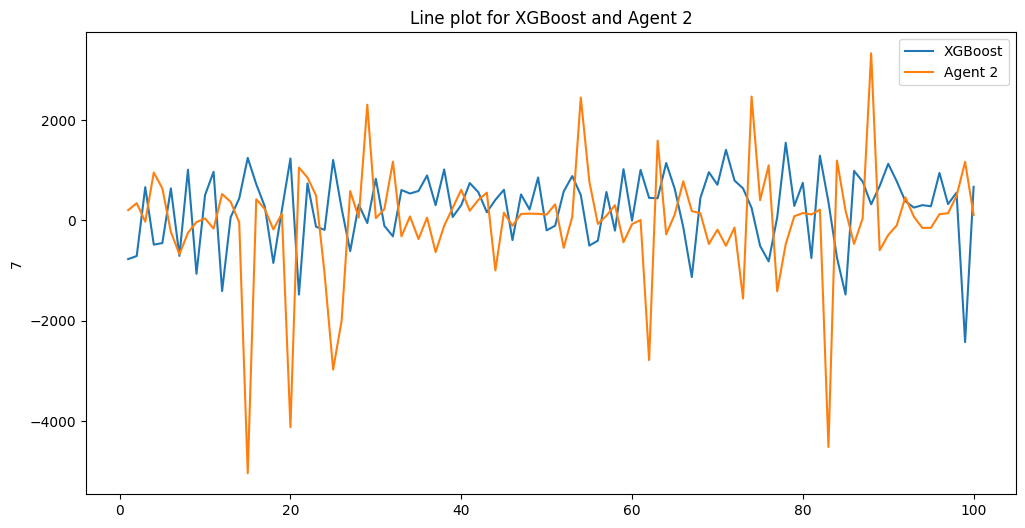

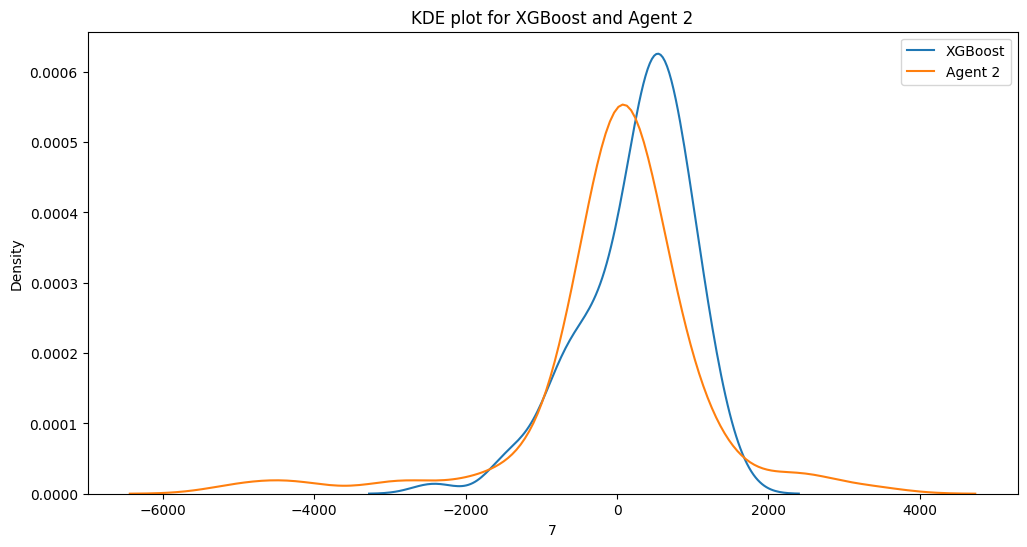

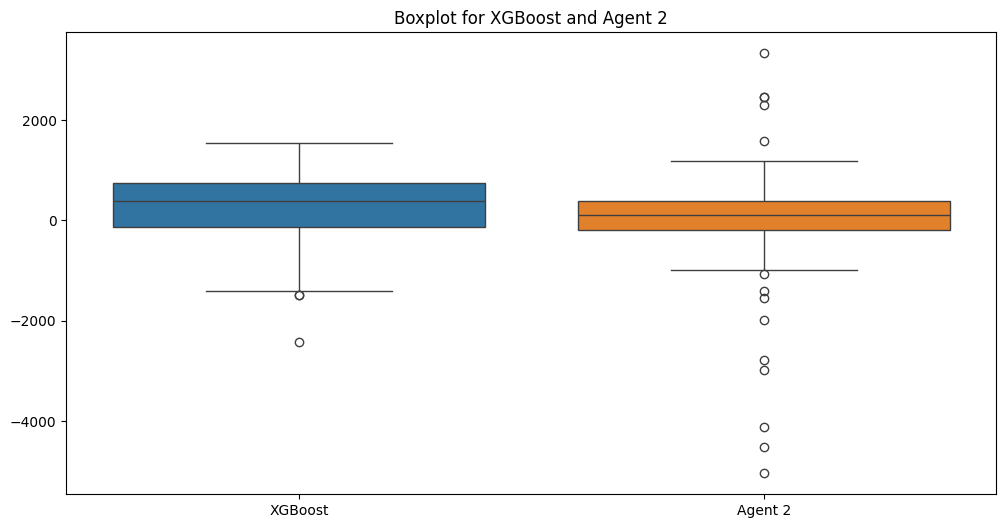

P_value_xgboost 0.00023497563240558898
pvalue_other_agent  1.3325770574488635e-10
not normal
There is a statistically significant difference
P-Value 0.0035712577899178464



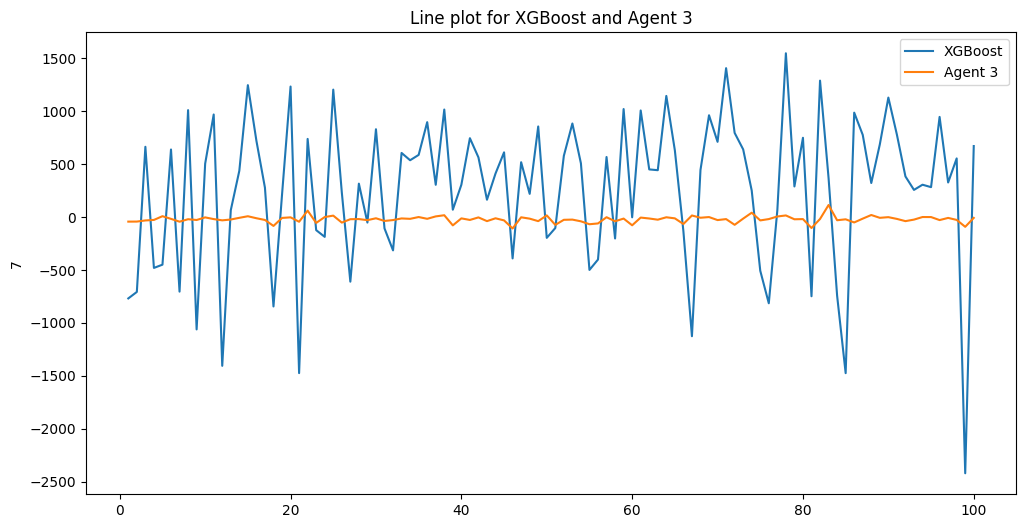

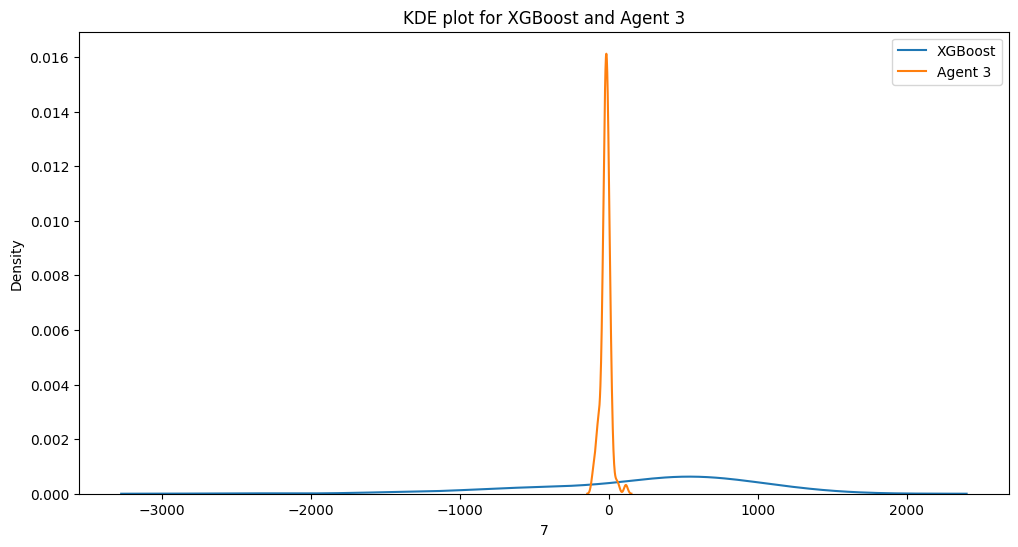

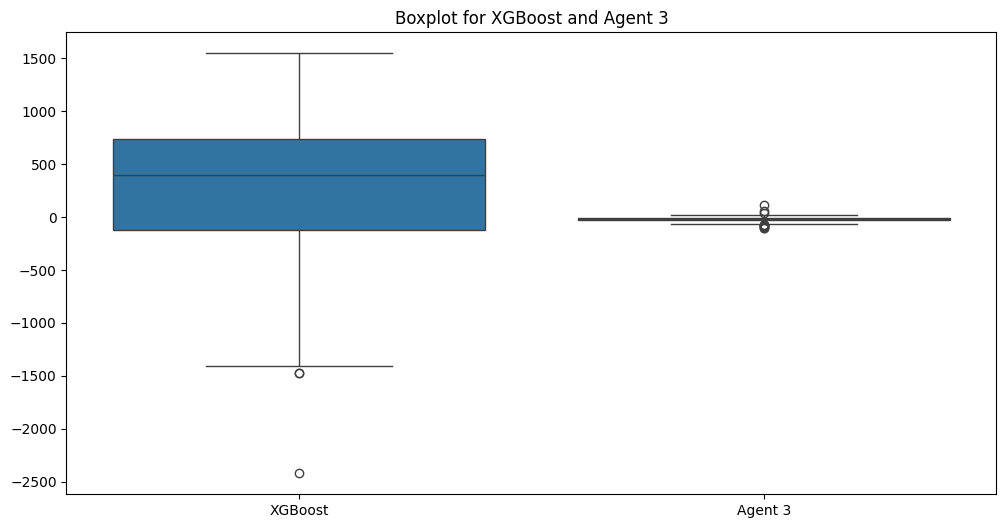

P_value_xgboost 0.00023497563240558898
pvalue_other_agent  3.0864337814211806e-05
not normal
There is a statistically significant difference
P-Value 3.2997219830270926e-07



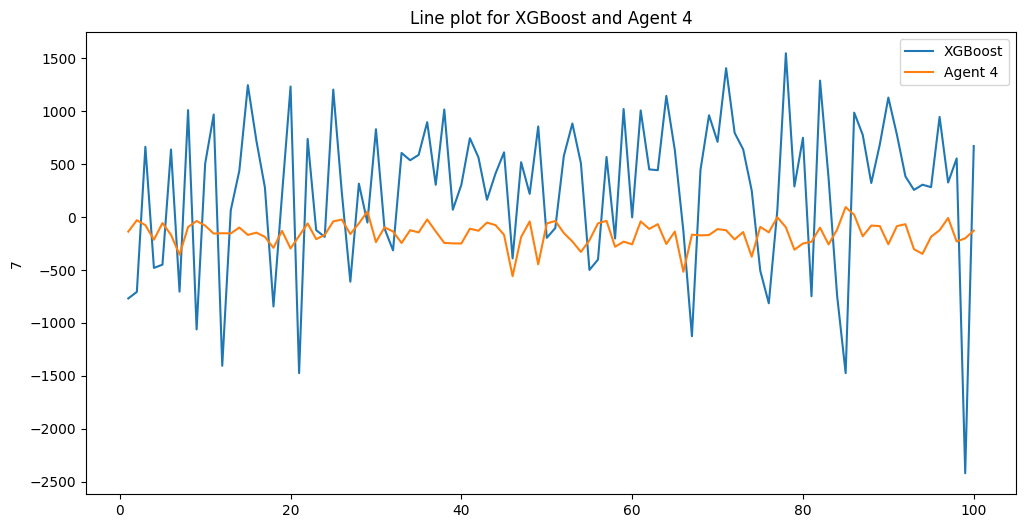

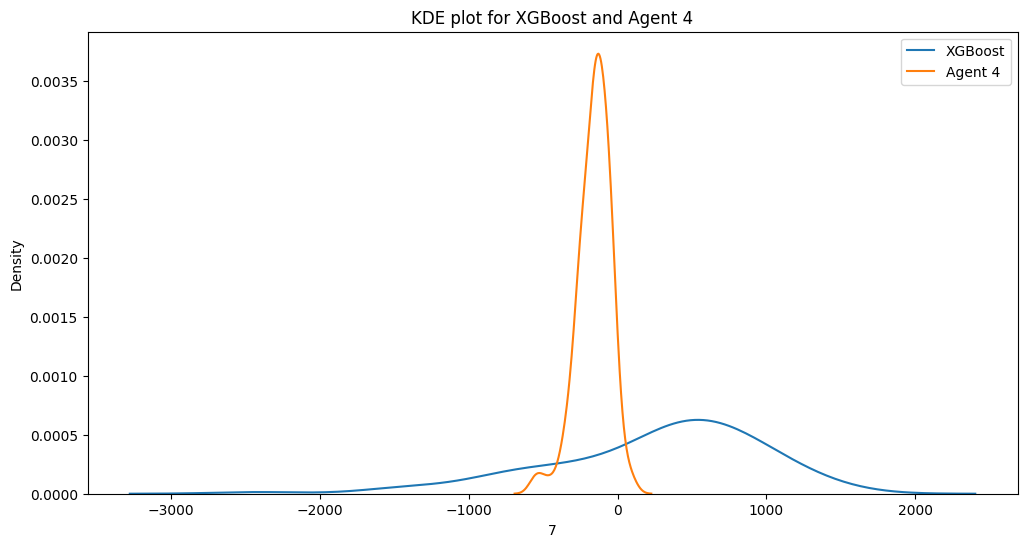

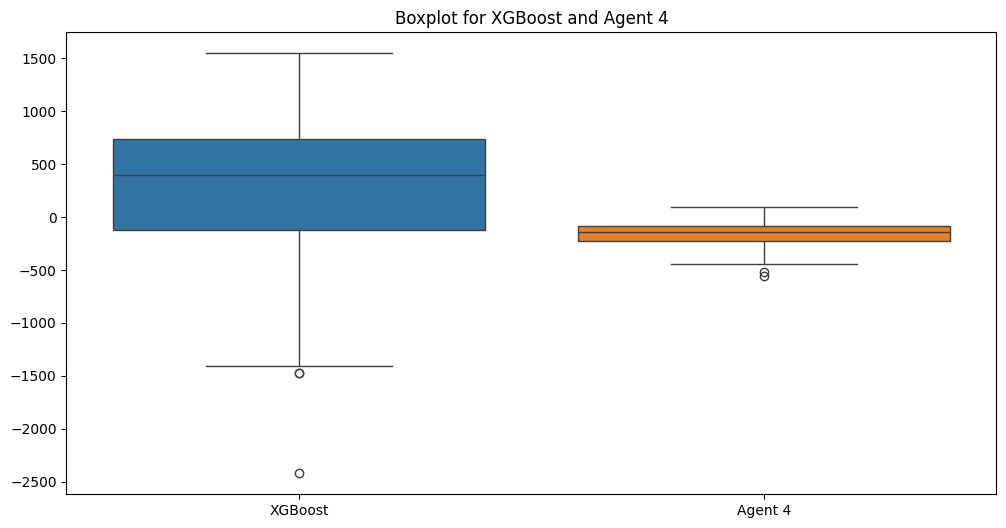

P_value_xgboost 0.00023497563240558898
pvalue_other_agent  0.0019315339564685992
not normal
There is a statistically significant difference
P-Value 5.140327456301871e-10



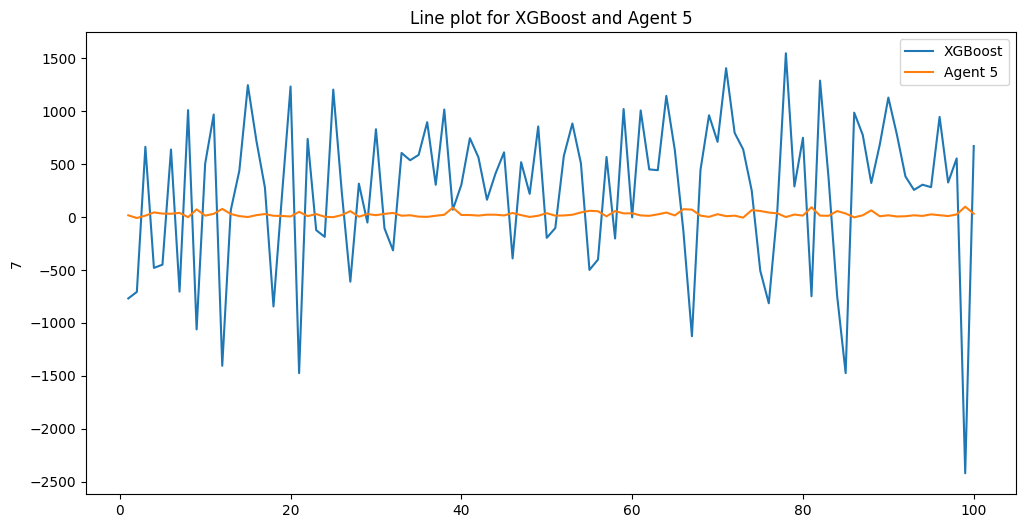

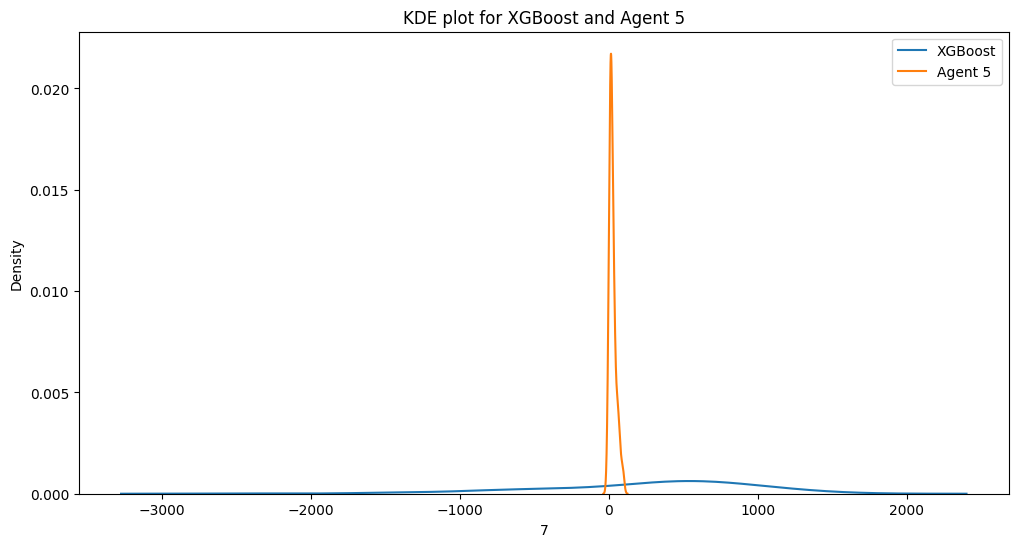

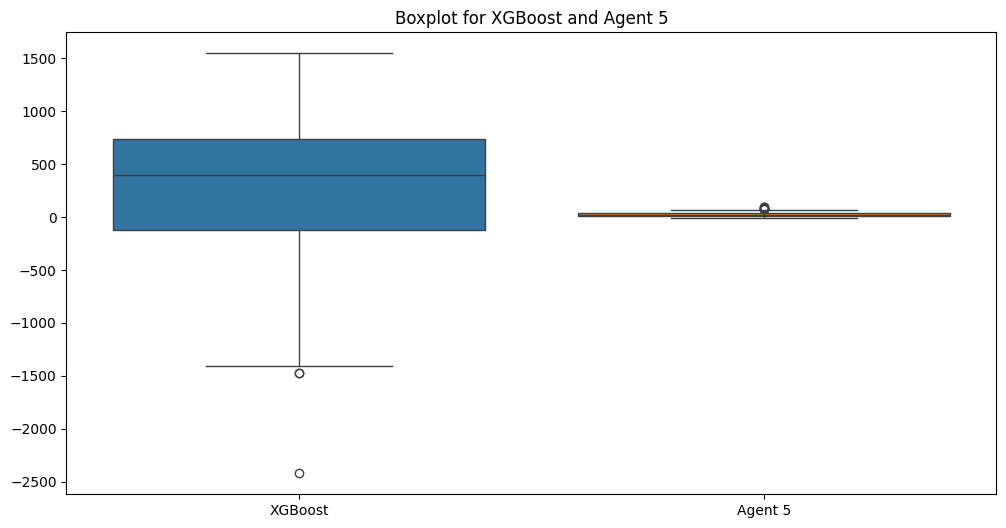

P_value_xgboost 0.00023497563240558898
pvalue_other_agent  1.1353269626365914e-06
not normal
There is a statistically significant difference
P-Value 1.3201538797215e-06



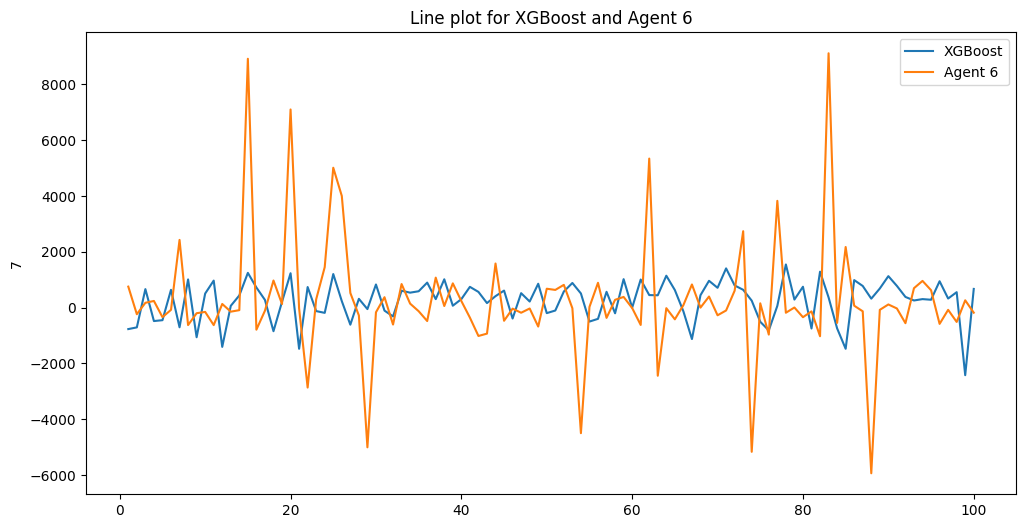

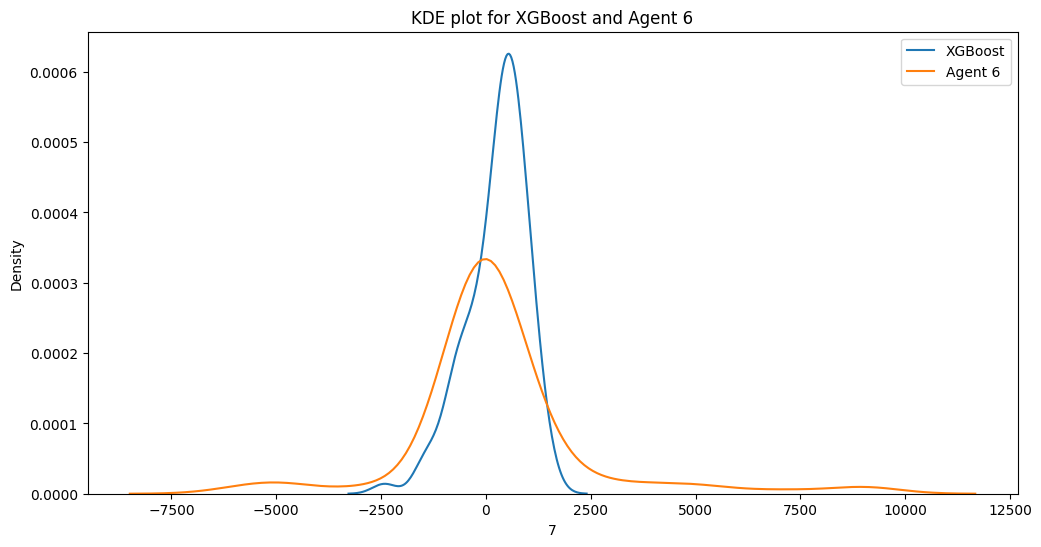

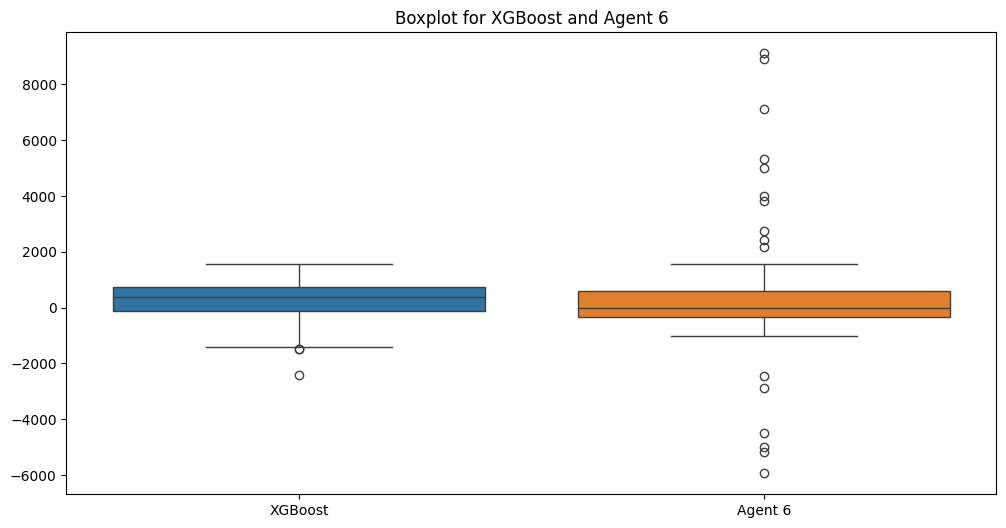

P_value_xgboost 0.00023497563240558898
pvalue_other_agent  5.913018769901496e-12
not normal
There is a statistically significant difference
P-Value 0.018079849679794445



In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]

    # Line plot for XGBoost and the other agent
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=xgboost_avg_balance, label='XGBoost')
    sns.lineplot(data=other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('Line plot for XGBoost and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # KDE plot for the distributions
    plt.figure(figsize=(12, 6))
    sns.kdeplot(xgboost_avg_balance, label='XGBoost')
    sns.kdeplot(other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('KDE plot for XGBoost and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost_avg_balance.rename('XGBoost'), 
                               other_agent_balance.rename('Agent ' + str(col_index+1))], axis=1)
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined_data)
    plt.title('Boxplot for XGBoost and Agent ' + str(col_index+1))
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost = stats.shapiro(xgboost_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost", pvalue_xgboost)
    print("pvalue_other_agent ", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


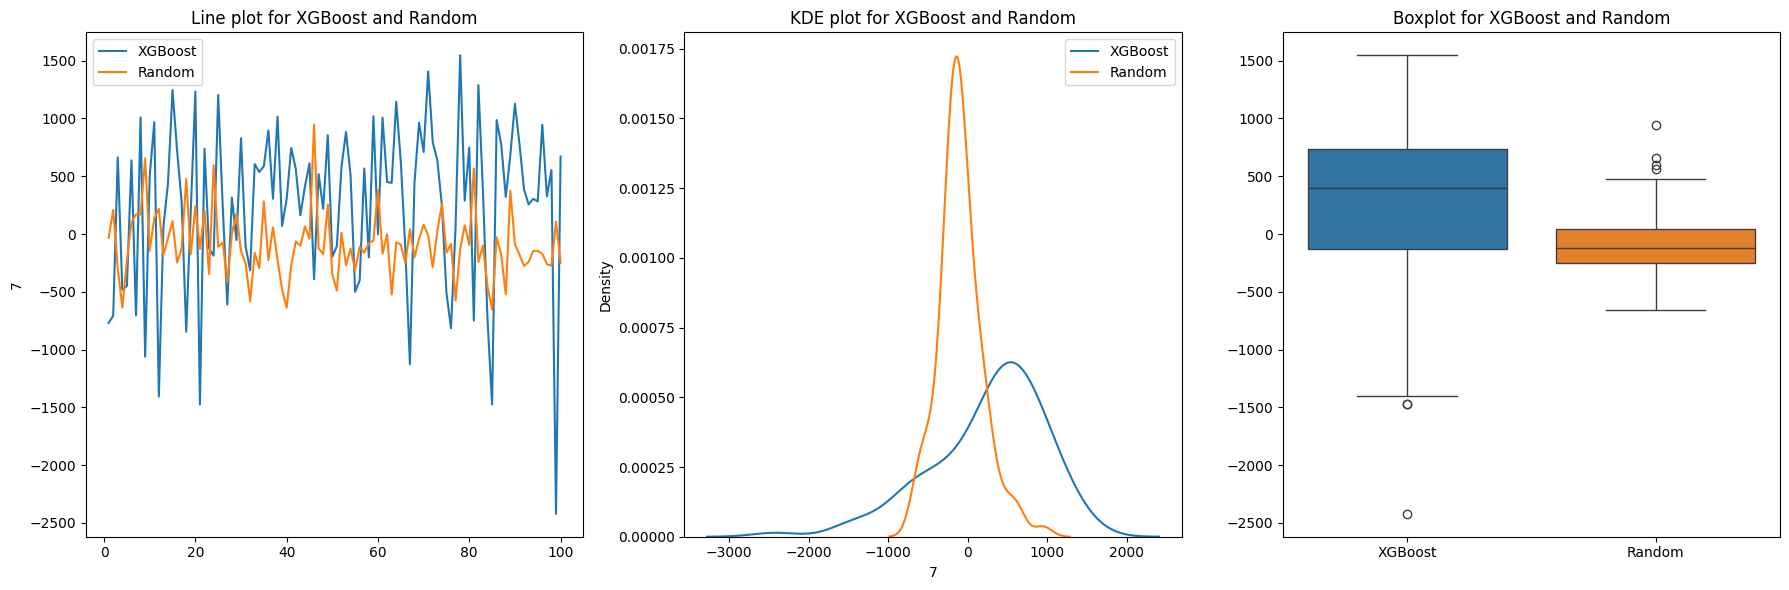

P_value_xgboost 0.00023497563240558898
P_value_Random 0.0014449784477318212
not normal
There is a statistically significant difference
P-Value 7.902220956942271e-08



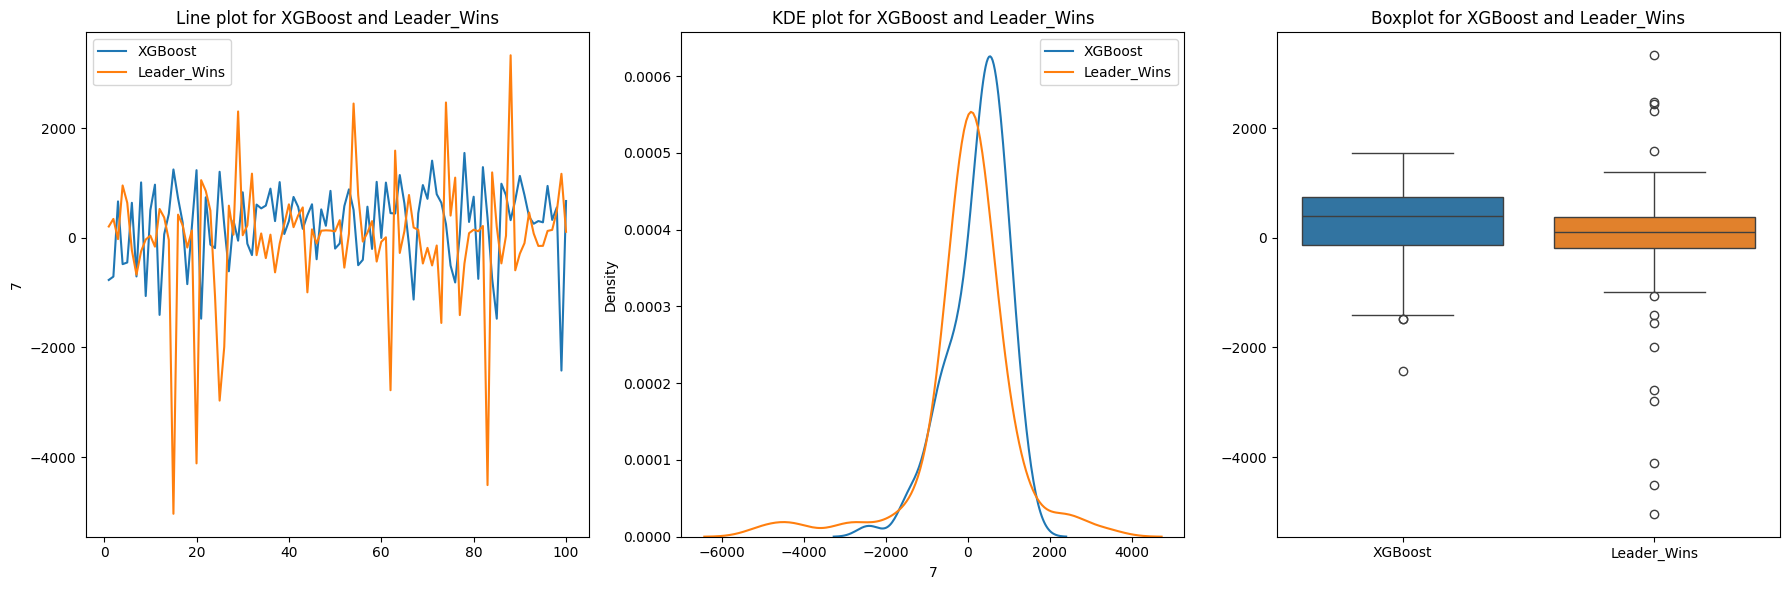

P_value_xgboost 0.00023497563240558898
P_value_Leader_Wins 1.3325770574488635e-10
not normal
There is a statistically significant difference
P-Value 0.0035712577899178464



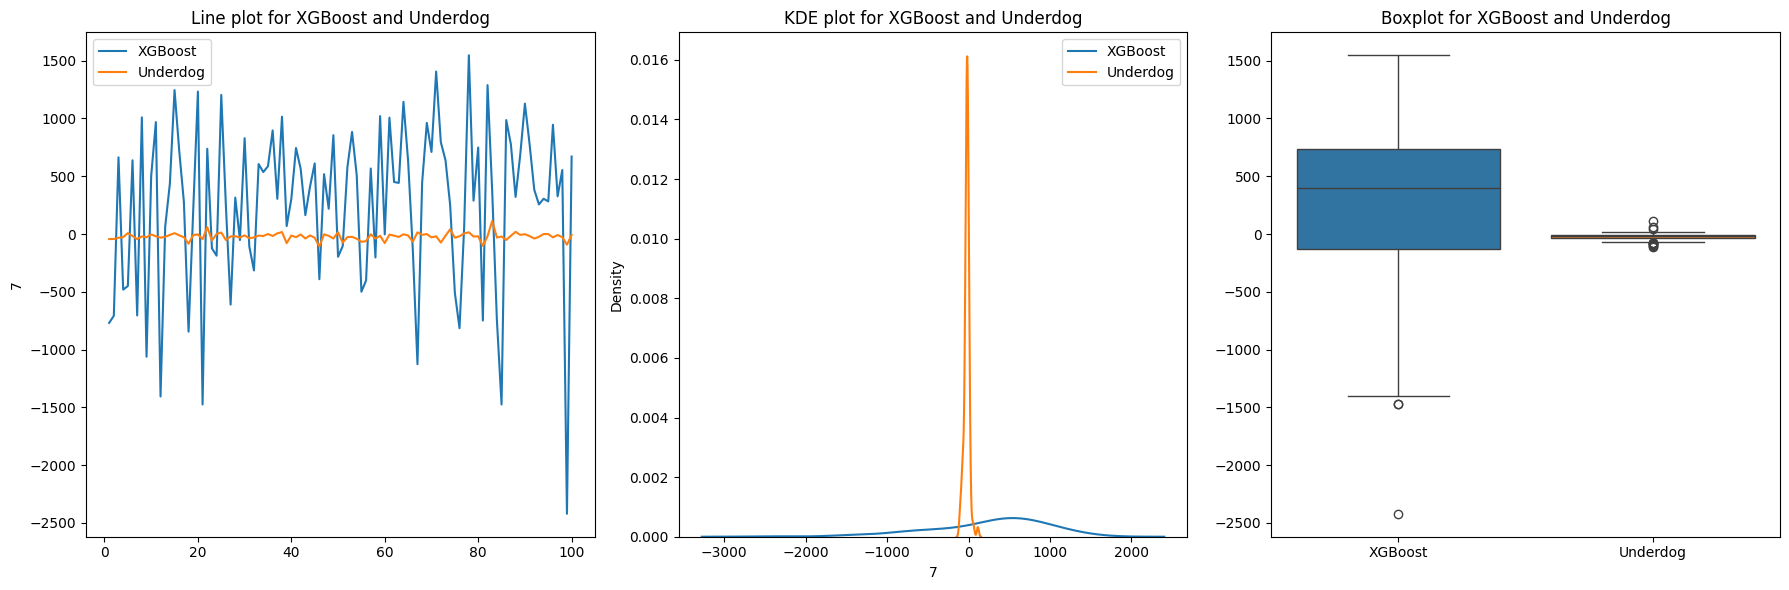

P_value_xgboost 0.00023497563240558898
P_value_Underdog 3.0864337814211806e-05
not normal
There is a statistically significant difference
P-Value 3.2997219830270926e-07



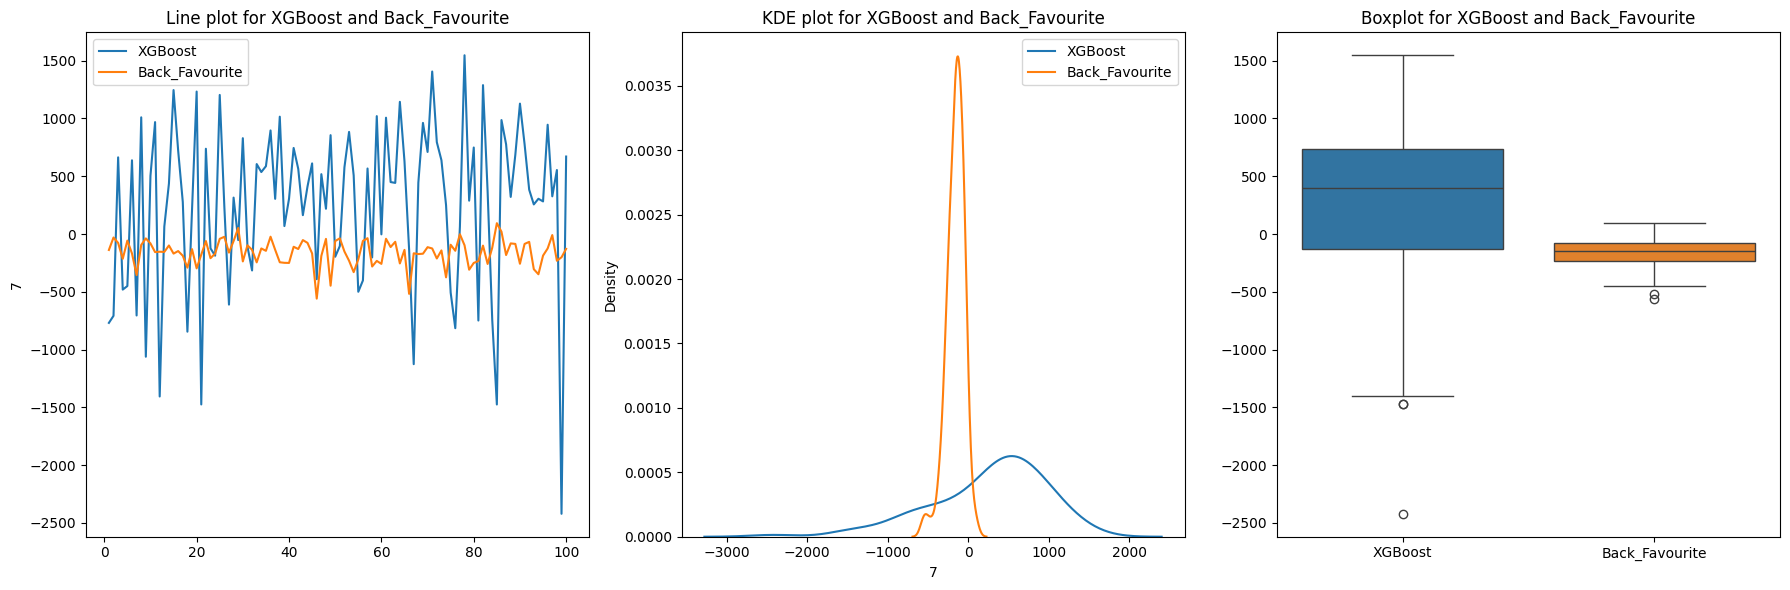

P_value_xgboost 0.00023497563240558898
P_value_Back_Favourite 0.0019315339564685992
not normal
There is a statistically significant difference
P-Value 5.140327456301871e-10



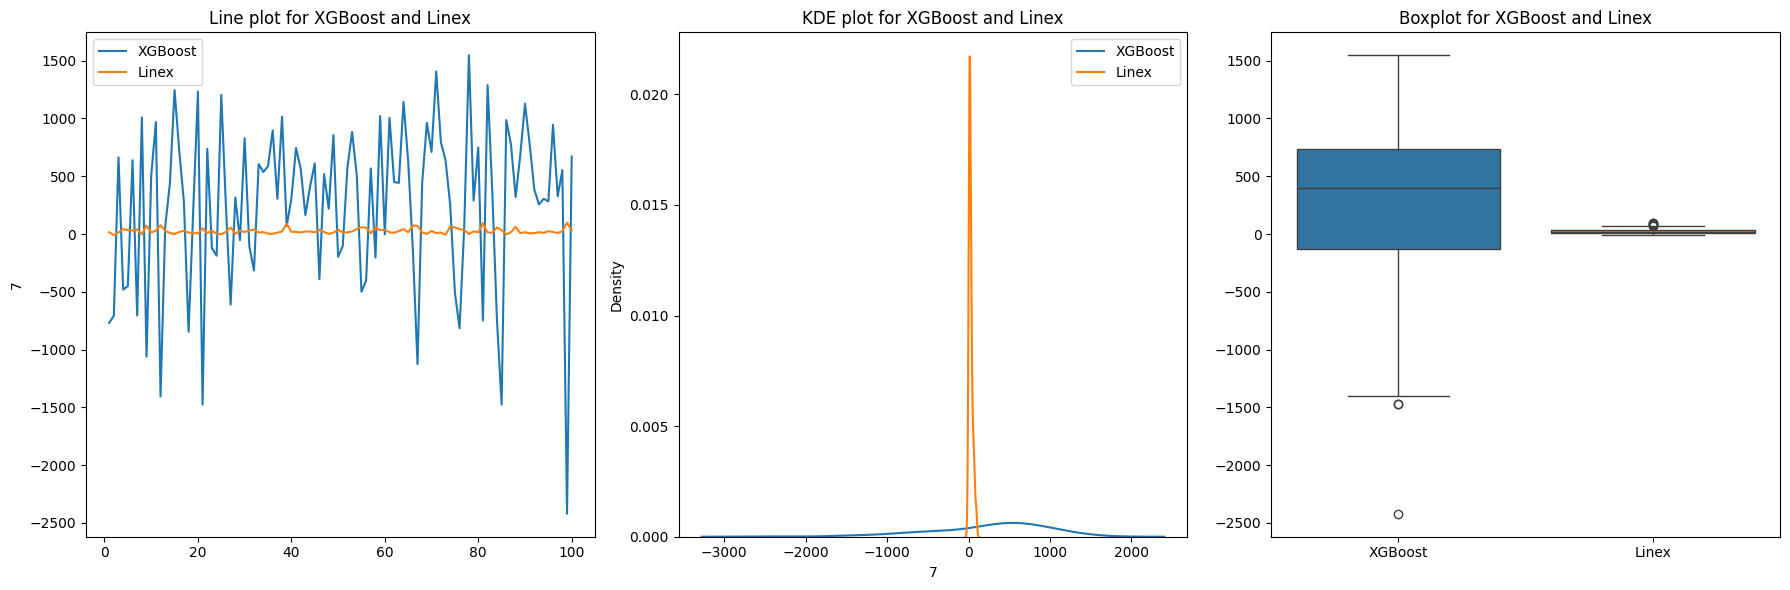

P_value_xgboost 0.00023497563240558898
P_value_Linex 1.1353269626365914e-06
not normal
There is a statistically significant difference
P-Value 1.3201538797215e-06



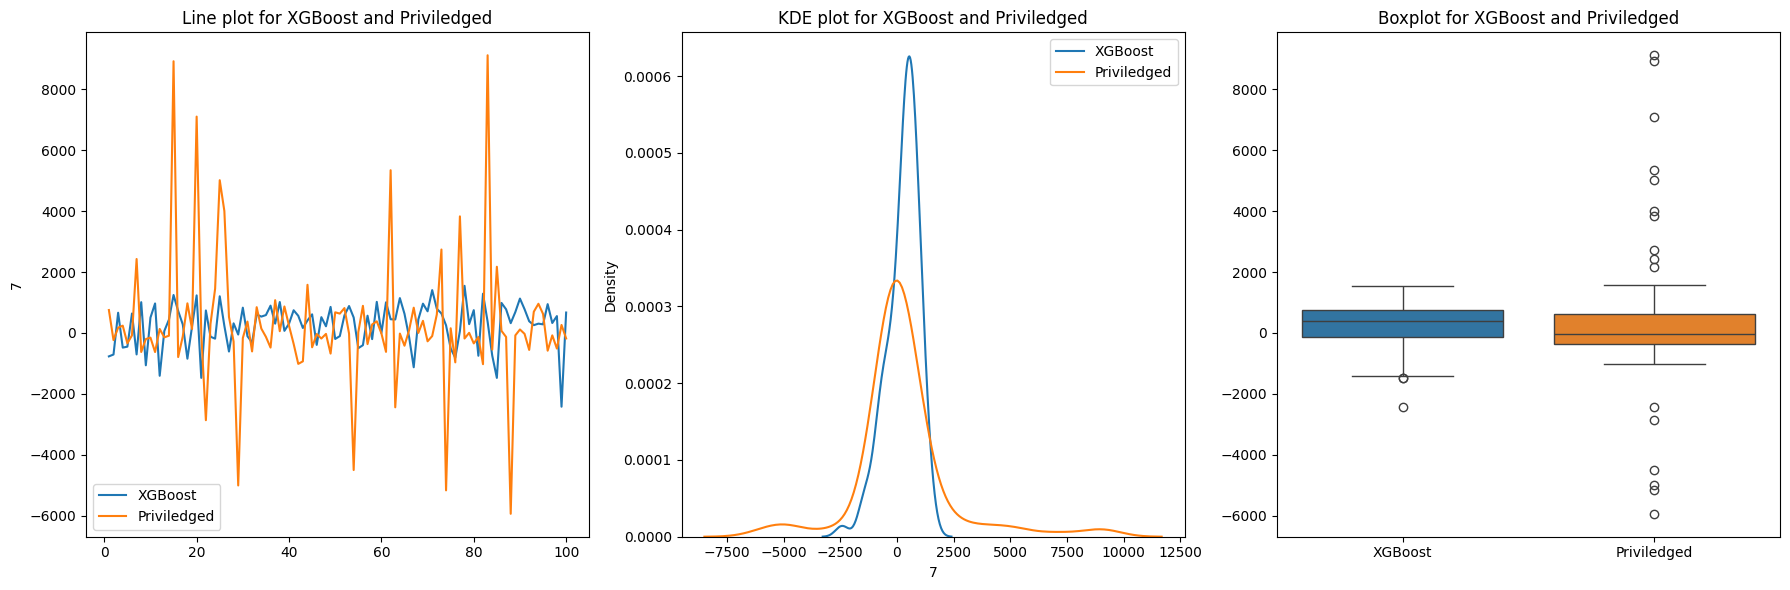

P_value_xgboost 0.00023497563240558898
P_value_Priviledged 5.913018769901496e-12
not normal
There is a statistically significant difference
P-Value 0.018079849679794445



In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged"]

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost_avg_balance, ax=axes[0], label='XGBoost')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost and {agent_name}')
    axes[0].legend()

    # KDE plot for the distributions
    sns.kdeplot(xgboost_avg_balance, ax=axes[1], label='XGBoost')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost and {agent_name}')
    axes[1].legend()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost_avg_balance.rename('XGBoost'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost and {agent_name}')
    
    plt.tight_layout()
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost = stats.shapiro(xgboost_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost", pvalue_xgboost)
    print(f"P_value_{agent_name}", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


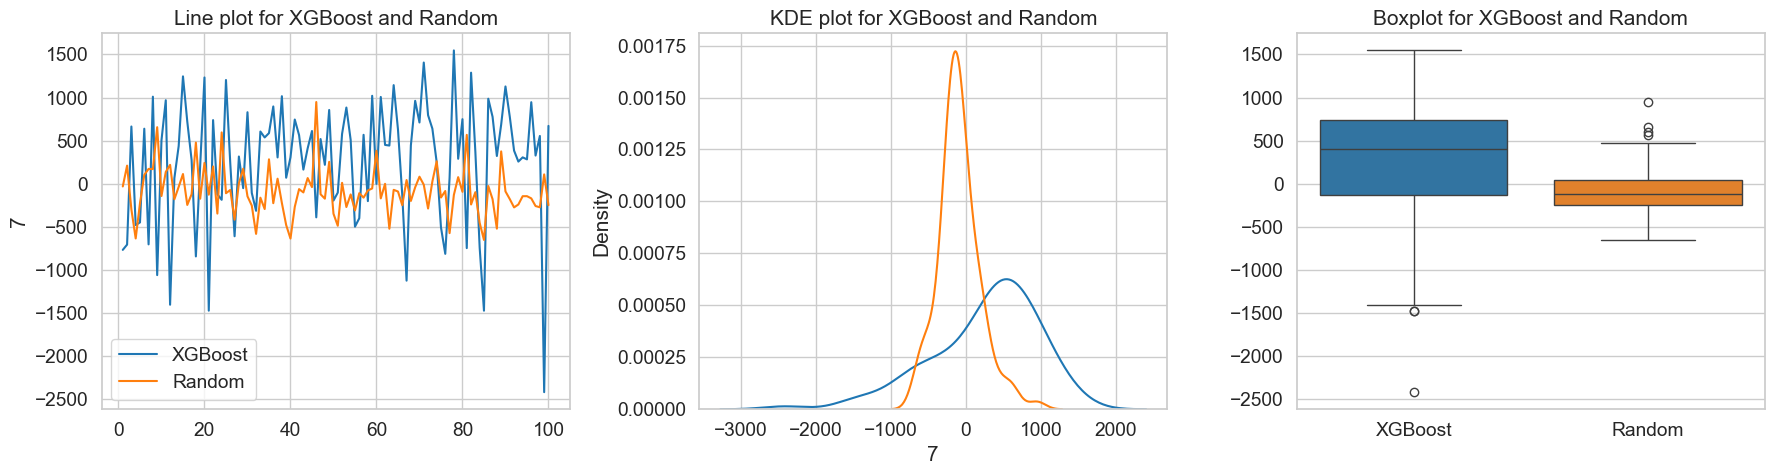

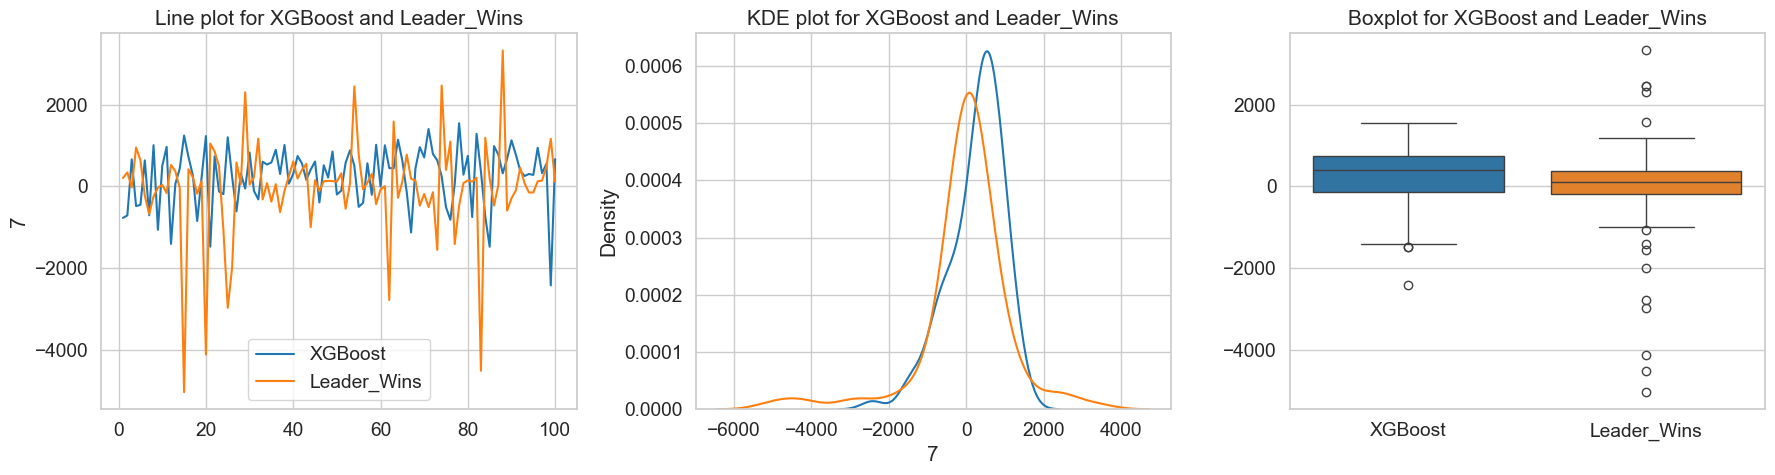

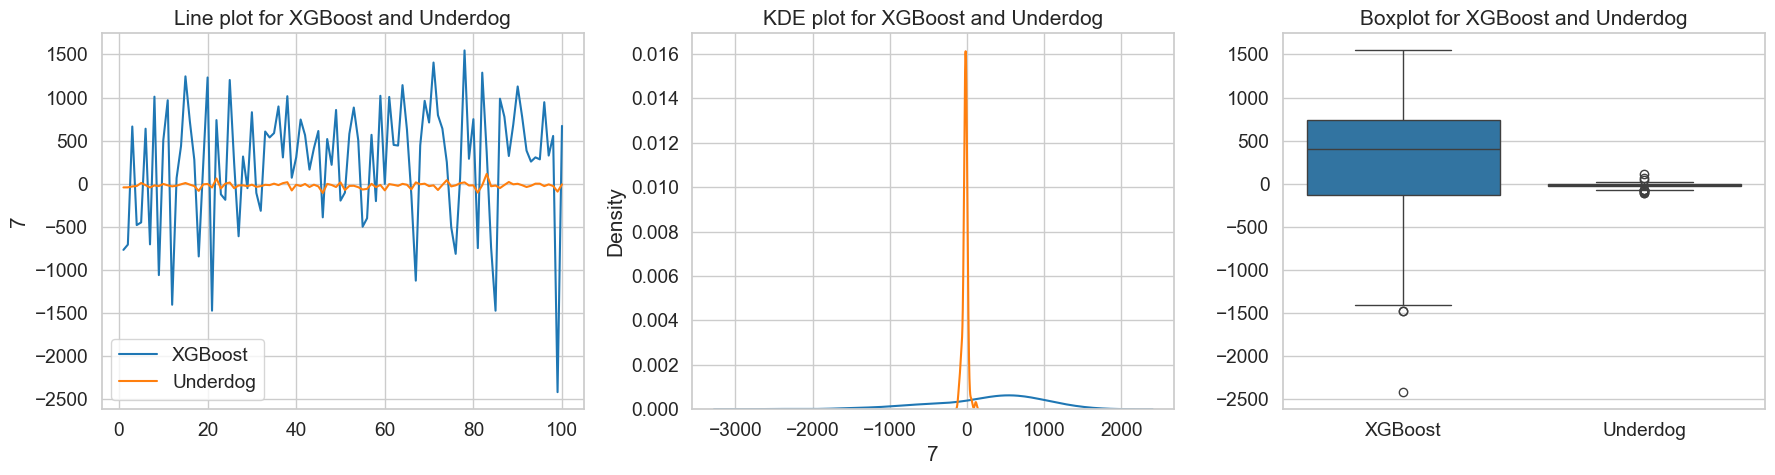

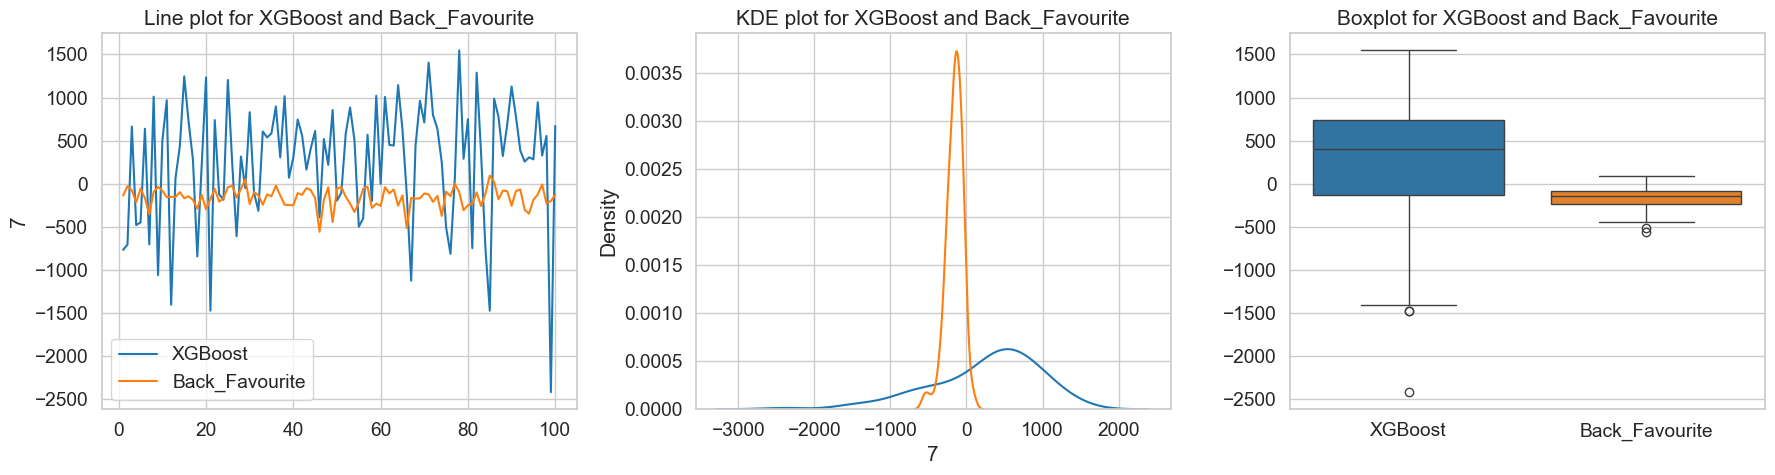

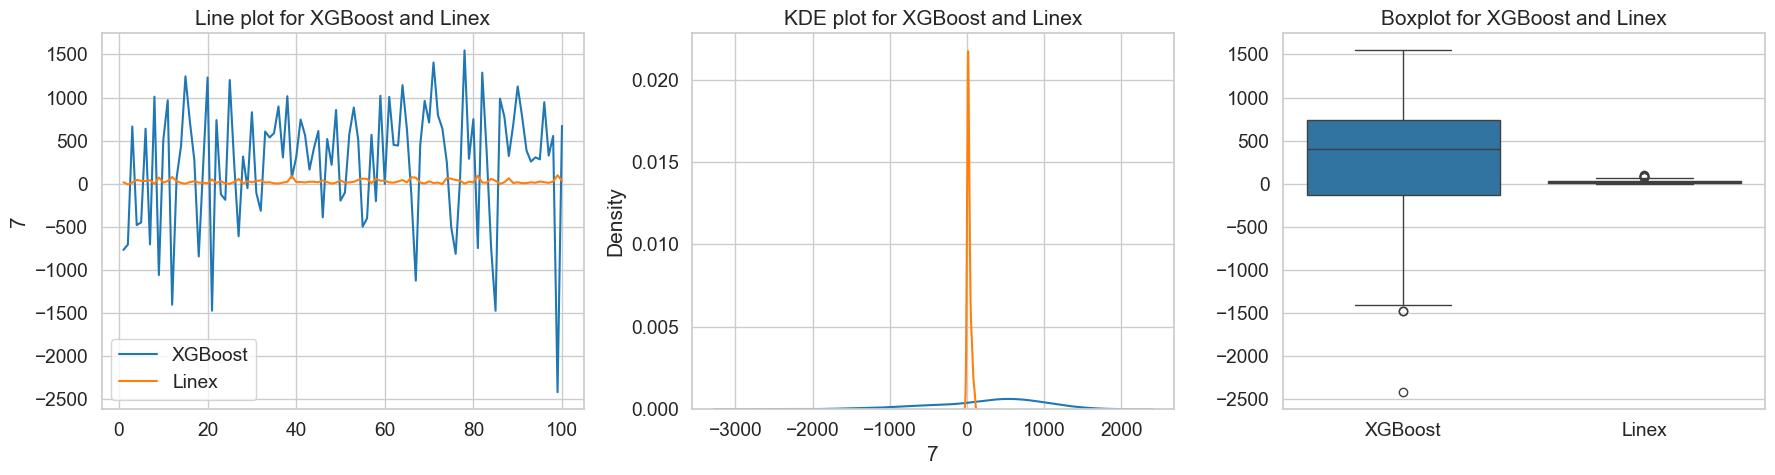

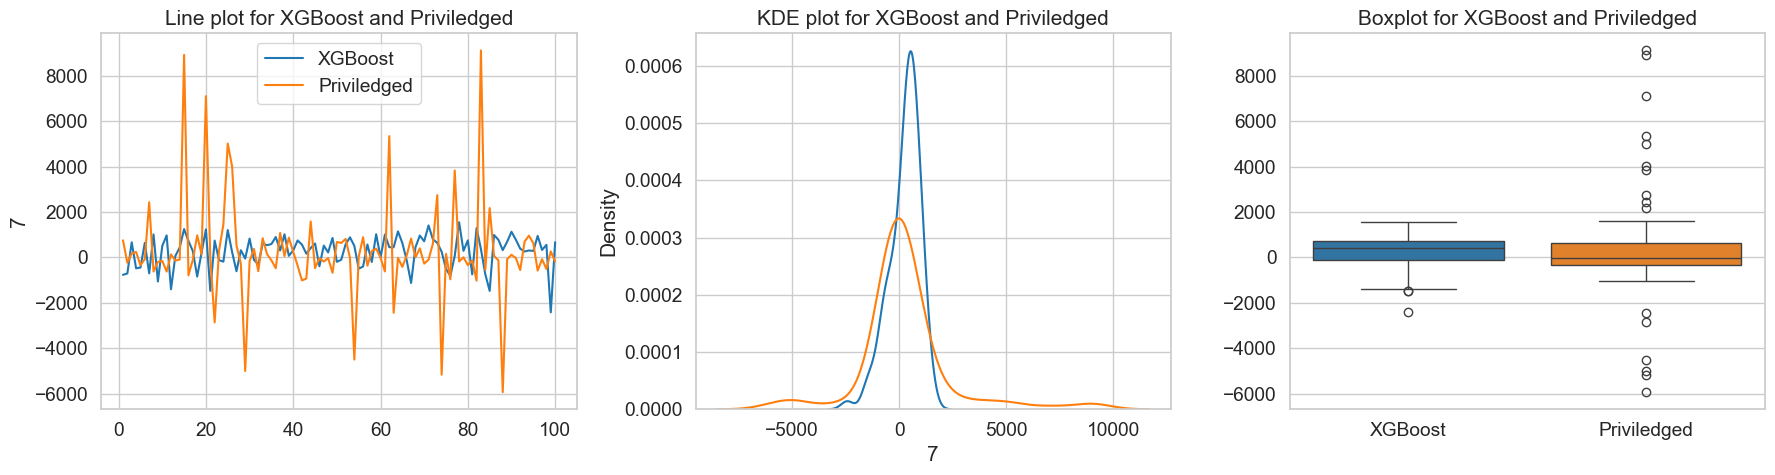

In [8]:
xgboost_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged"]

# Setting style and text scale for seaborn plots
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)  # Adjust the font_scale to increase text size

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally with modified height
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Decreased the height from 6 to 5

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost_avg_balance, ax=axes[0], label='XGBoost')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost and {agent_name}')

    # KDE plot for the distributions
    sns.kdeplot(xgboost_avg_balance, ax=axes[1], label='XGBoost')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost and {agent_name}')

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost_avg_balance.rename('XGBoost'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost and {agent_name}')
    
    plt.tight_layout()
    plt.show()